# Support Vector Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)
X_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [4]:
sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(y.reshape(len(y), 1))
y_scaled

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training whole SVR on the whole dataset

In [5]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X_scaled, y_scaled)

/home/atharv/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [6]:
y_pred = regressor.predict(sc_X.transform([[6.5]]))
sc_y.inverse_transform([y_pred])

array([[170370.0204065]])

## Visualising the SVR Results

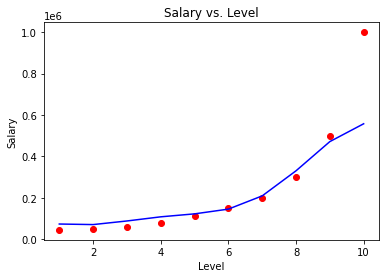

In [9]:
plt.scatter(X, y, color='red')
plt.plot(X, sc_y.inverse_transform(regressor.predict(X_scaled).reshape(len(y), 1)), color='blue')
plt.title('Salary vs. Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR Results (for higher resolution and smoother curve)

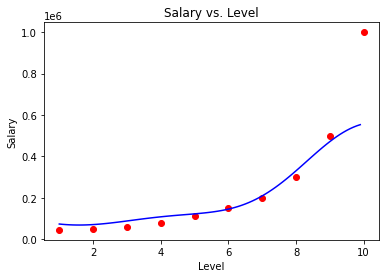

In [11]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(
    sc_X.transform(X_grid)).reshape(len(X_grid), 1)), color='blue')
plt.title('Salary vs. Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()